# Santa Barbara
# Locution, Cerraduras 
# Locks y Location

<a href="https://colab.research.google.com/github/ProfDoeg/Colegio_Invisible/blob/master/03_cuaderno.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Preparar el Espacio (Prepare the Space)

In [ ]:
! git clone https://github.com/ProfDoeg/Colegio_Invisible.git
! pip install eciespy

# Historias

<center>
<div>
<img src="https://github.com/ProfDoeg/Colegio_Invisible/raw/main/img/barb_1.jpeg" width="250"/>
</div>
</center>

In [ ]:
from IPython.display import Audio 
snds = ['loc_barbara','loc_simbolos','loc_ventana','loc_palabras']
for snd in snds:
    path = f'Colegio_Invisible/sound/{snd}.m4a'
    show=Audio(path)
    display(show)

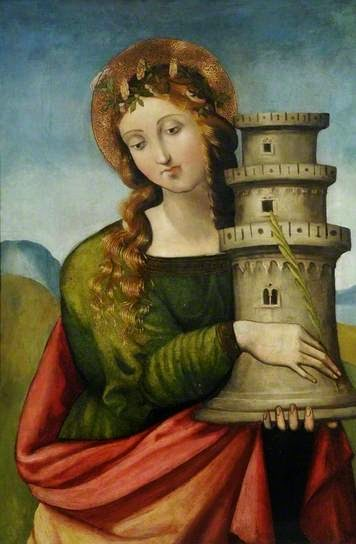

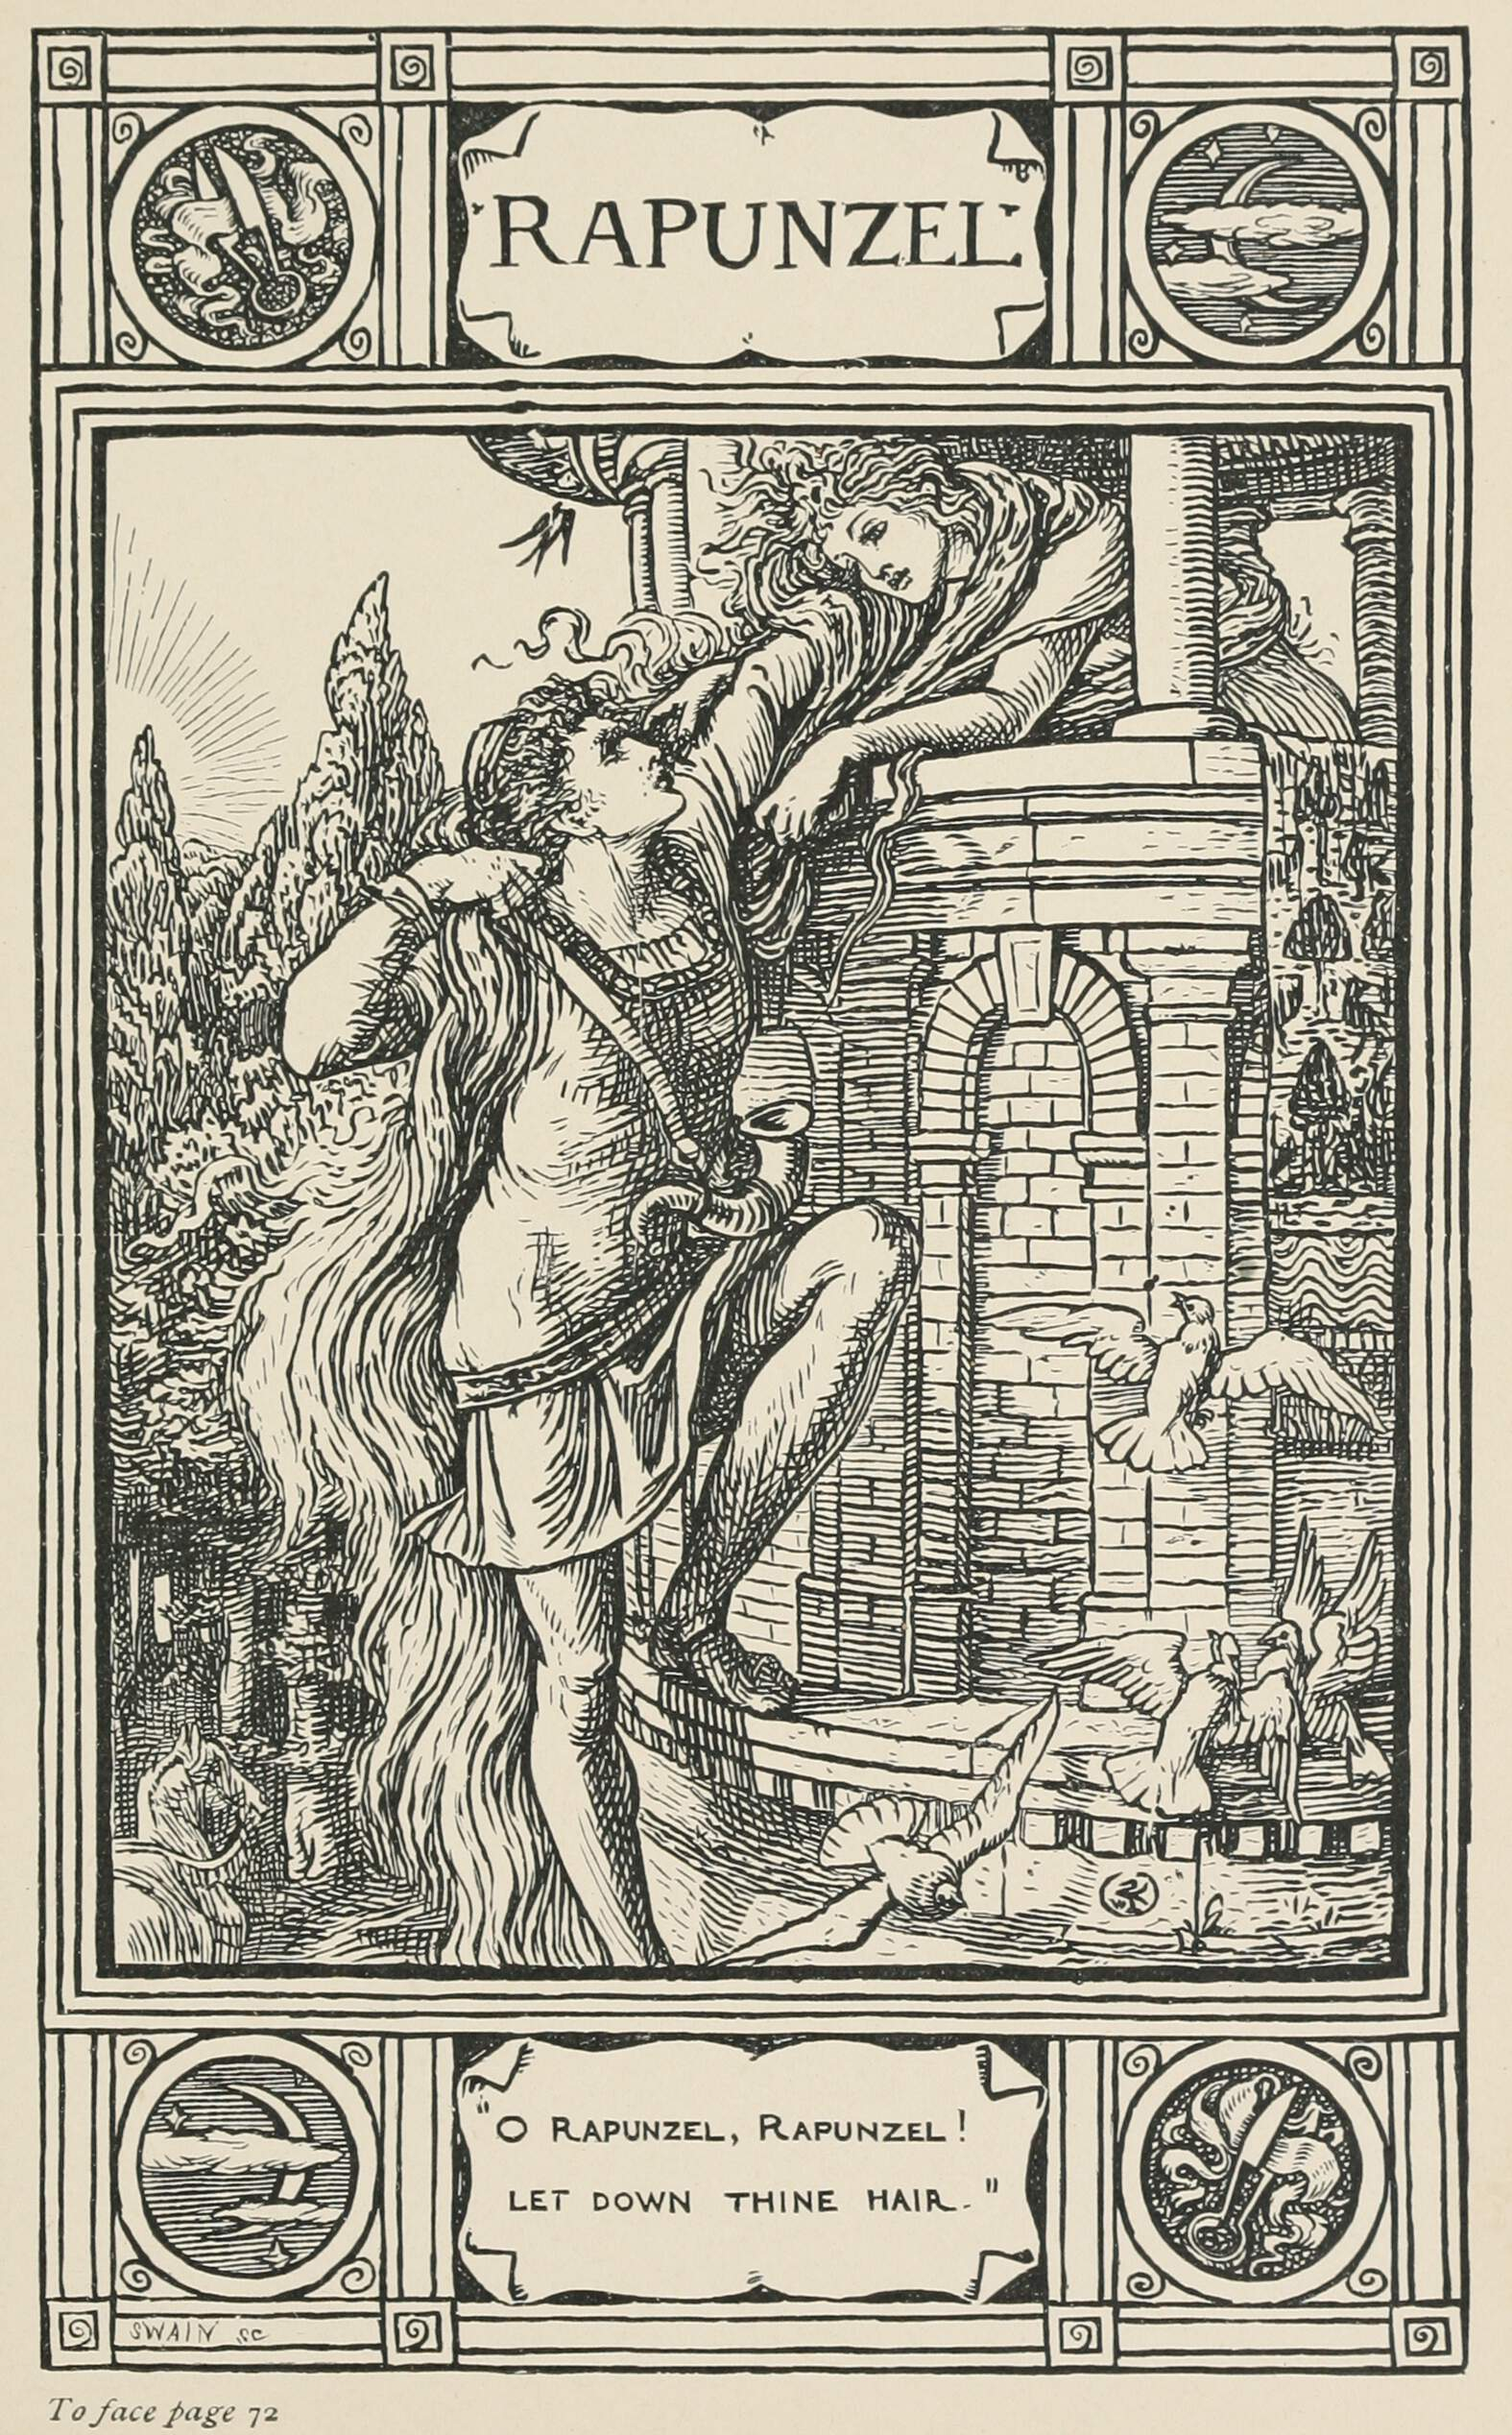

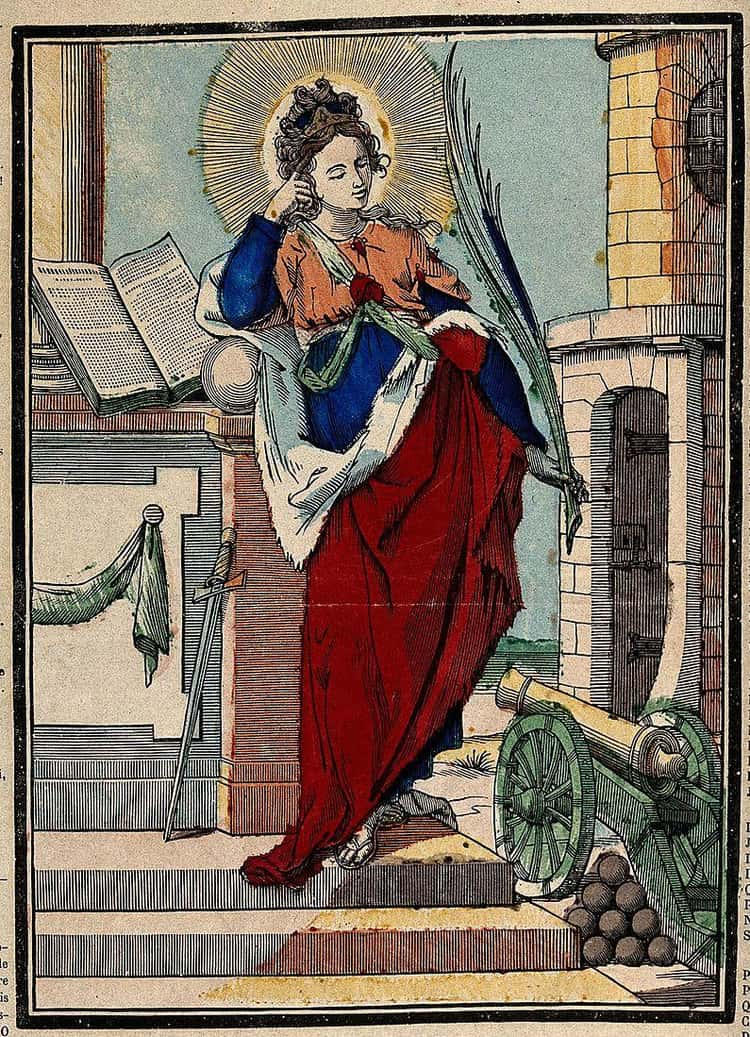

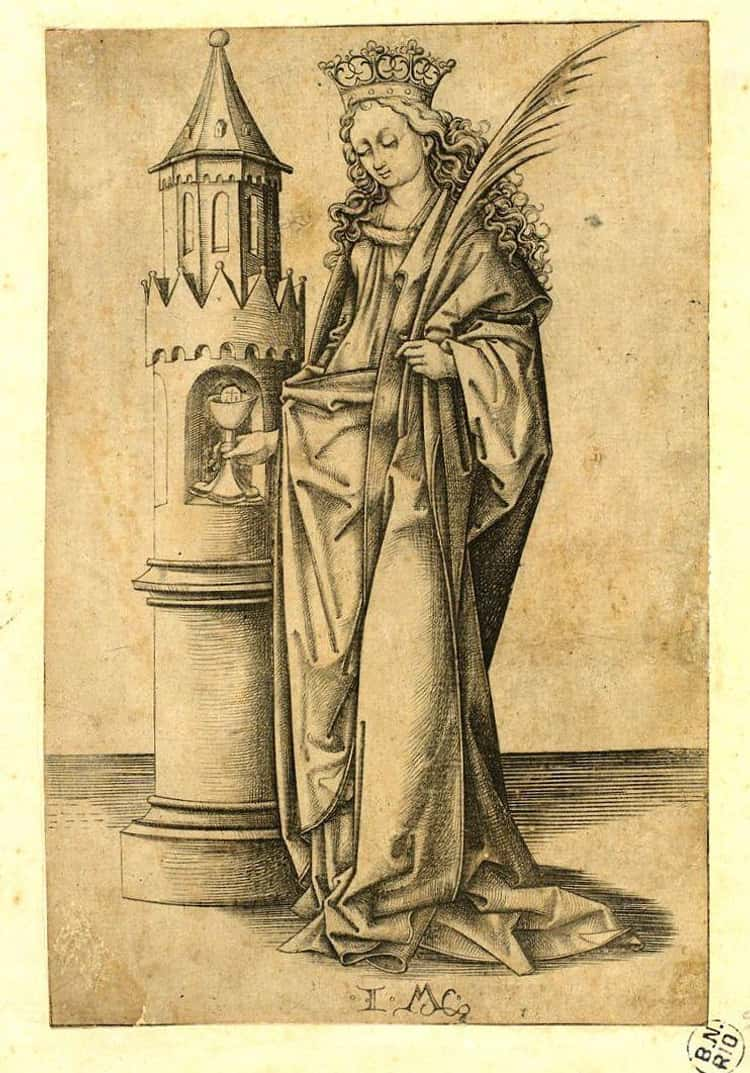

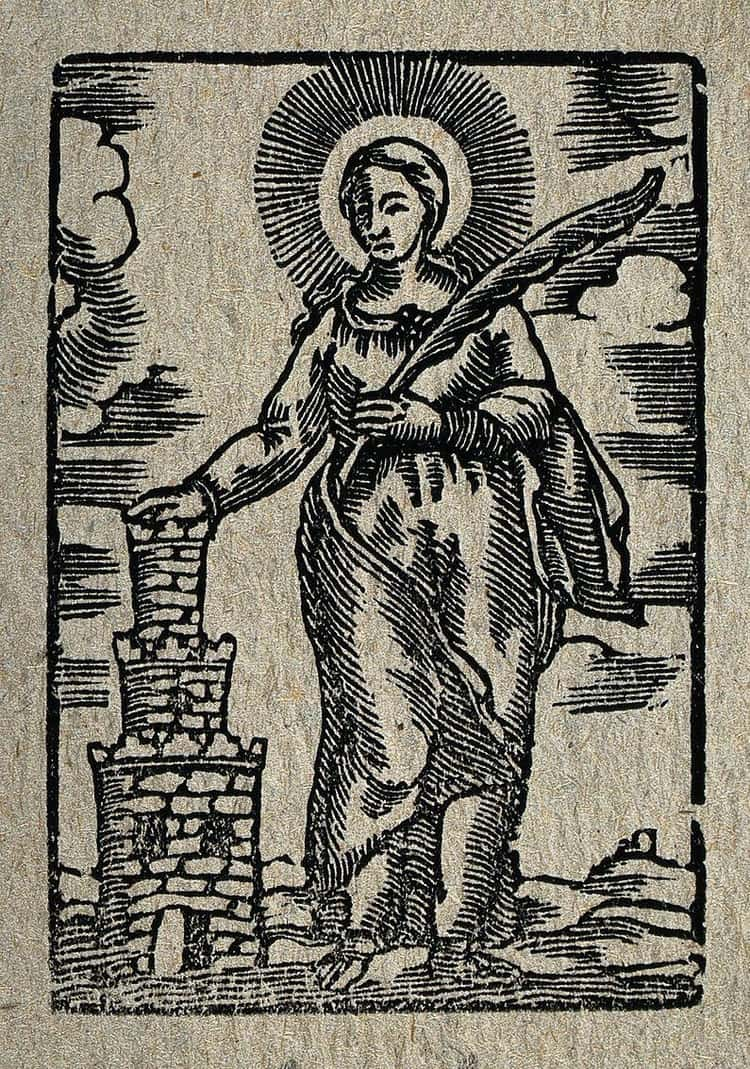

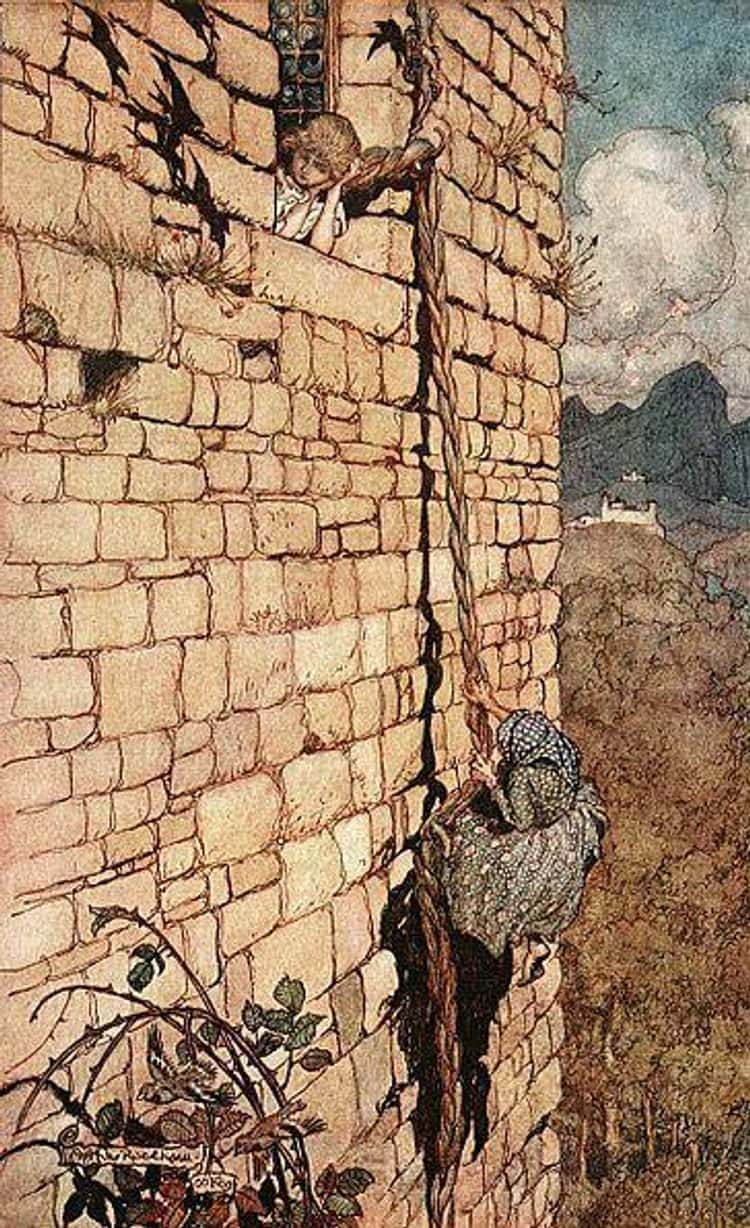

In [ ]:
from IPython.display import Image 
import os
imgs = [img for img in os.listdir('Colegio_Invisible/img') if 'barb_' in img]
for img in sorted(imgs)[1:]:
    path = f'Colegio_Invisible/img/{img}'
    show=Image(path)
    display(show)

# Criptografía Intermedia y Escritura de Guiones (Intermediate Cryptography and Scripts)

## Esquema (Outline) 
***
***
En este paso más profundo aprenderemos:
***
In this deeper dive we cover:
***
***
-   la criptografía asimétrica (asymmetric cryptography)
-   guiones de python (python scripts)



## Metas (Goals)
***
***


By the end of the exposition you will be able to :

- entender las calidades de la **criptografía asimétrica**\
(understand the features of **asymmetric cryptography**)
- generar un nuevo objecto de **clave privada**\
(generate a new **private key** object)
- acceder al valor byte o hex de la clave privada\
(access the byte or hex value of the private key)
- importar una **clave privada** generada anteriormente desde bytes\
(import a previously generated **private key** from bytes)
- generar y guardar un archivo de clave privada protegido por contraseña mediante un script de python\
(generate and save a password protected private key file using a python script)
- derivar una **clave pública** de la clave privada\
(derive a **public key** from the private key)
- acceder al valor byte o hexadecimal de la clave pública\
(access the byte or hex value of the public key)
- importar una **clave pública** previamente generada a partir de bytes\
(import a previously generated **public key** from bytes)
- derivar y guardar una clave protegida por contraseña utilizando un guión de python\
(derive and save a password protected public key file using a python script)
- tirar los contenidos de un archivo que lleva una clave protegido por AES\
(dump the contents of an AES protected key file)
- sar el teclado para teclar y guardar unos archivos que llevan una clave protegidos por AES usando un guión de python\
(use the keyboard to type and save AES password protected key files using a python script) 
- entender una firma digital de ECDSA\
(understand ECDSA digital signature)
- **firmar** un mensaje con una clave privada\
(**sign** a message with a private key)
- **verificar** un mensaje con una firma con una clave pública\
(**verify** a message signature with a public key_
- entender ECIES\
(understand ECIES)
- **cifrar con ECIES** con una clave pública\
(**ECIES encrypt** with a public key)
- **decifrar con ECIES** con una clave privada\
(**ECIES decrypt** with a private key)


# Criptografía Asimétrica (Asymmetric Cryptography)

***
***
La criptografía asimétrica, o criptografía da una clave-pública, es un sistema que utiliza pares de claves: claves públicas (que se puede conocer otros), y claves privadas (que solo conoce el dueño de la clave).
***
Asymmetric cryptography, or public-key cryptography, is a system that uses pairs of keys: public keys (which may be known to others), and private keys (which may never be known by any except the owner).
***
***

- Claves públicas son generadas por claves privadas\
(Public keys are generated from private keys)
- Claves públicas se puede ver otros\
(Public keys are shown to others)
- Claves privadas siempre son privadas\
Private keys are held private

<br></br>
<div>
<img src="https://github.com/ProfDoeg/Colegio_Invisible/raw/main/img/asymmetric.png" width="500"/>
</div>

***
***
Las dos claves tienen la acción opuesta. Si una se abre la otra se cierra.
***
The two keys have the opposite action. If one locks the other unlocks.
***
***

- una clave está utilizado para cifrar [cerrar] y la otra está utilizado para decifrar [abrir]\
(one key is used to encrypt [lock] and the other is used to decrypt [unlock])
- cuando la clave pública está utilizado para cifrar y solo la clave privada puede decifrar, significa que solo una entidad puede decifrar  pero cualquiera puede cifrar\
(when the public key is used to encrypt only the private key can decrypt. this means only one entity can decrypt but anyone can encrypt)
- Cuando la clave privada está utilizado para cifrar y solo la clave pública puede decifrar, significa que cualquiera de las claves pueden decifrar pero solo una entidad puede cifrar\
(when the private key is used to encrypt only the public key can decrypt. this means anyone can decrypt but only one entity can encrypt)

***
***
**CIFRAR** \
Para cifrar y decifrar:
***
**ENCRYPTION** \
For encryption and decryption:
***
***
- La clave pública del receptor está utilizado para cifrar\
(recipients public key is used to encrypt)
- La clave privada del receptor está utilizado para decifrar\
 (the recipients private key is used to decrypt)
***
*** 
**FIRMA DIGITAL**\
Para la verificación y firma:
***
**DIGITAL SIGNATURE**\
For signature and verification
***
***
- la clave privada de el remitiente está utilizado para firmar el hash del texto para generar una firma\
 (the sender's private key is used the sign the hash of a text to generate a signature)
- la clave pública está utilizada para volver la firma a la forma hash y compararlo con el hash del texto. Si los hashes son iguales el texto/firma/clave pública caben y la firma se considera válida\
 (the sender's public key is used to turn the signature back into the hash and compared to the hash of the text. if the hashes match then the text/signature/pubkey fit and the signature is deemed valid)
***
***
**ECC** y RSA son diferentes tipos de criptografía asimétrica. "Elliptic-curve cryptography" (ECC) es una aproximación a la criptografía de la clave-pública basada en la estructura algebraica de las curvas elípticas sobre campos finitos. ECC permite claves más pequeñas en comparación con RSA.
***
**ECC** and RSA are different kinds of asymmetric cryptography.
Elliptic-curve cryptography (ECC) is an approach to public-key cryptography based on the algebraic structure of elliptic curves over finite fields. ECC allows smaller keys compared to RSA.
***
***
**secp256k1** refiere a los parametros de la curva elíptica utilizado en la criptografía public-key de Ethereum, Bitcoin y sus derivadas. 
***
**secp256k1** refers to the parameters of the elliptic curve used in Ethereum's, Bitcoin's, and their derivatives' public-key cryptography.
***
***

## Implementación de Python (Python Implementation)

Usaremos la colección de la criptografía asimétrica creado por Weiliang Li.
***
We will be using the asymmetric cryptography library developed by Weiliang Li.
- https://github.com/kigawas
- https://github.com/ecies/py

## Importacíones (Imports)

- importar las colecciones requeridas\
(import the required libraries)
- mirar los guiones\
(have a look at the scripts)
- hacer un directorio de las claves\
(make a directory for keys)

In [ ]:
import ecies
import eth_keys

In [ ]:
! ls Colegio_Invisible/scripts

In [ ]:
! mkdir keys

# Gestionar Claves (Key Management)
Esta travesía empieza con el manejo de las claves y los archivos que llevan las claves.
***
This journey begins by managing keys and keyfiles.
***
***
En  esta implementación de ECC:
***
In this implementation of ECC:
***
***
- claves privadas son de 32 bytes [64 numeros hex]\
(private keys are 32 bytes [64 hex numerals])
- claves públicas son de 64 bytes [128 numeros hex]\
(public keys are 64 bytes [128 hex numerals])





## Claves Privadas (Private Keys)
Claves privadas tienen que ser secretos. Nunca las comparte.
***
Private keys must be kept secret. Never ever share them.
***
***
Metas de seguridad:
***
Security goals:
***
***
- claves privadas tienen que ser únicos\
(private keys must be unique)
- claves privadas tienen que ser secretos\
(private keys must be secret)

### Generar Clave Privada (Generate Private Key)

Hay varios metodos para crear claves. Empezaremos usando el método `generate_eth_key()`. Se produce una clave única usando un generador de numeros pseudo-arbitrarios.

Este método produce un objecto de la clave privada. 
***
There are various methods for creating keys. We will start by using the `generate_eth_key()` method. This produces a unique key using a psuedo-random number generator.

The method produces a private key object.

In [ ]:
#this generates a private key object
privKey1 = ecies.utils.generate_eth_key()
privKey1, type(privKey1)

In [ ]:
#this generates a private key
privKey2 = ecies.utils.generate_eth_key()
privKey2, type(privKey2)

### Tirar Bytes de la Clave Privada (Dump Private Key Bytes)
Aquí recibimos los 32 bytes de los datos desde el objecto de la clave privada.
***
Here we get the actual 32 bytes of data from the private key object.

In [ ]:
#here we can dump the contents of the private key as bytes
privKey1_bytes=privKey1.to_bytes()
privKey1_bytes,privKey1_bytes.hex()

### Importar una Clave Privada que Fue Generada Anteriormente desde Bytes 
### (Import Previously Generated Private Key From Bytes)
Aquí creamos un objecto de la clave privada desde 32 bytes de data
***
Here we create a private key object from 32 bytes of data.

In [ ]:
#here we are generating a key object from previously generated bytes
privKey1_copy=eth_keys.keys.PrivateKey(privKey1_bytes)
privKey1_copy,type(privKey1_copy)

### Generar Clave Privada y Guardarlo en un Archivo Protegido por un Password AES Utilizando un Guión
### (Generate Private Key and Save in AES Password Protected File Using a Script)

El guión `ecc_generate.py` es una herramienta de mando para producir una clave privada 

Los 32 bytes están guardadas en un archivo protegido por AES password 
***

The script `ecc_generate.py` is a command line tools for producing a private key. 

The 32 bytes are stored in an AES password protected file.

In [ ]:
! ls Colegio_Invisible/scripts
! cat Colegio_Invisible/scripts/ecc_generate.py

In [ ]:
! python Colegio_Invisible/scripts/ecc_generate.py keys/my_privkey.enc

## Public Keys

- claves públicas son públicas y compartidas con el mundo\
(public keys are public and shared with the world)
- claves públicas están derivadas por la clave privada\
(public keys are derived from the private key)
- la clave privada no puede ser derivada desde la clave pública entonces la acción solo va en una dirección\
(the private key cannot be derived from the public key so the action is one-way)

### Derivar Clave Pública desde la Clave Privada (Derive Public Key From Private Key)
Derivando la clave pública a través del acceso del atributo `public_key` desde el objecto de la clave privada.
***
Deriving the public key object by accesing the `public_key` attribute from the private key object.

In [ ]:
pubKey1=privKey1.public_key
pubKey1

In [ ]:
pubKey2=privKey2.public_key
pubKey2

### Tirar Bytes de la Clave Pública (Dump Public Key Bytes)
Aquí obtenemos los 64 bytes de los datos desde el objecto de la clave privada
***
Here we get the actual 64 bytes of data from the public key object.

In [ ]:
pubKey1_bytes=pubKey1.to_bytes()
pubKey1_bytes

### Importar Claves Privadas Anteriormente Generadas Desde Bytes 
### (Import Previously Generated Private Key From Bytes)
Aquí creamos un objecto de la clave pública desde 64 bytes de datos.
***
Here we create a public key object from 64 bytes of data.

In [ ]:
pubKey1_import=eth_keys.keys.PublicKey(pubKey1_bytes)
pubKey1_import,type(pubKey1_import)

### Usar un Guion Para Extraer la Clave Pública y  Guardarla en un Archivo
### (Extract Public Key and Save to File Using Script)

El guión `ecc_pubkey_extract.py` es una herramienta de "línea de mando" para extraer una clave pública desde una clave privada. 

Los 64 bytes están guardados en un archivo protegido por un password de AES.
***

The script `ecc_pubkey_extract.py` is a command line tools for extracting a public key from a private key. 

The 64 bytes are stored in an AES password protected file.

In [ ]:
! cat Colegio_Invisible/scripts/ecc_pubkey_extract.py

In [ ]:
! python Colegio_Invisible/scripts/ecc_pubkey_extract.py keys/my_privkey.enc keys/my_pubkey.enc

## Entrada/Salida (Input/Output)

Aquí aprendemos la utilización de los guiones de python para crear o tirar los contenidos de los archivos de las claves.
***
Here we cover the use of python scripts to create or dumpt the contents of key files.

### Tirando Los Contenidos de un Archivo AES Protegido Utilizando Un Guión
### (Dumping the Contents of an AES Protected Key File Using a Python Script)

El guión `ecc_keydump.py` decifrará y imprimirá los contenidos de un archivo de la clave. 
***
The script `ecc_keydump.py` will decrypt and print the contents of a keyfile.

In [ ]:
! cat Colegio_Invisible/scripts/ecc_keydump.py 

In [ ]:
! python Colegio_Invisible/scripts/ecc_keydump.py keys/my_pubkey.enc

In [ ]:
pubkey=!{'python Colegio_Invisible/scripts/ecc_keydump.py keys/my_pubkey.enc'}
pubkey

In [ ]:
bytes.fromhex(pubkey[-1])

### Ingresar A Través Del Teclado: Contenidos De Un Archivo Protegido Por AES Password Utilizando Un Guión de Python 
### (Keyboard Input Contents of an AES Password Protected Key File Using a Python Script)

Este guión `ecc_keyboard.py` guardará una entrada del teclado como un archivo de clave. Es útil cuando se hace claves privadas de mano utilizando un proceso arbitrario (lanzamiento de moneda, tirada de dados, etc). Es necesario cuando una clave privada está regalado y se quiere guardarlo en un archivo de clave.
***
The script `ecc_keyboard.py` will store a keyboard input as a keyfile. This is useful when you make private keys by hand with coin flips, dice rolls or by some other arcane process. It is also needed when a public key is given to you and you want to store it in a keyfile.

In [ ]:
! cat Colegio_Invisible/scripts/ecc_keyboard.py 

In [ ]:
! python Colegio_Invisible/scripts/ecc_keyboard.py keys/tecla_privkey.bin password123 0123456789abcdef0123456789abcdef0123456789abcdef0123456789abcdef

In [ ]:
! python Colegio_Invisible/scripts/ecc_keyboard.py keys/tecla_pubkey.bin password123 0123456789abcdef0123456789abcdef0123456789abcdef0123456789abcdef0123456789abcdef0123456789abcdef0123456789abcdef0123456789abcdef

# Firma Digital ECDSA
# Digital Signature ECDSA

***
***
La firma digital es una manera de asegurar la authenticidad y la integridad de un mensaje. 
***
Digital signature is a means by which we ensure the authenticity and integrity of a message.
***
***
- authenticidad tiene que ver con el fuente del mensaje\
(authenticity relates to the source of a message)
- integridad tiene que ver con el hecho de que los contenidos de un mensaje no hayan estado alterado de ningúna manera\
(integrity relates to the fact that a message has not been tampered with by adding, removing or changing its content)

***
***
**ECDSA** (Elliptic Curve Digital Signature Algoritm o Firma Algoritmo de la Curva Elíptica Digital) es un algoritmo para hacer una firma digital utilizando criptografía de curva elíptica 
***
**ECDSA** (Elliptic Curve Digital Signature Algoritm) is an algorithm for performing digital signature using elliptic curve cryptography. 
***
***
- la firma está hecho utilizando una clave privada y un texto en forma de bytes\
(signature is performed using a private key and a text in byte form)
- el algoritmo de la firma está utilizado para generar una firma\
 (signature algortitm is used generate a signature) 
- la verificación esta hecho utilizando el trillizo: firma/ texto/ clave pública\
(verification is performed using the triplet signature/text/publickey)
 
https://en.wikipedia.org/wiki/Elliptic_Curve_Digital_Signature_Algorithm

*NOTA DE SEGURIDAD:* el texto y la firma se puede utilizar para recuperar el valor de la clave pública.
***
*SECURITY NOTE:* the text and signature can be used to recover the public key value

<br></br>
<div>
<img src="https://github.com/ProfDoeg/Colegio_Invisible/raw/main/img/signature.png" width="500"/>
</div>




## Firmar Mensaje (Sign Message)


Detalles (Details):
- el mensaje esta "hashed"\
 (the message is hashed)
- el hash esta cifrado utilizando la clave privada del usuario\
 (the hash is encrypted using the signers private key)
- este produce la firma\
(this yields the signature)

**SOLO UNA ENTIDAD SE PUEDE FIRMAR**: el usuario que ha creado la clave privada
***
**ONLY ONE ENTITY CAN SIGN**: holder of the private key
***
***
Aquí usamos el método `sign_msg()` para producir el objecto de la firma
***
Here we use the `sign_msg()` method to produce the signature object.

In [ ]:
"### lets make two messages
message_A=b'this is message A'
message_B=b'this is message B'

In [ ]:
### now lets criss-cross the two keys and two messages
signature_1A=privKey1.sign_msg(message_A)
signature_1B=privKey1.sign_msg(message_B)
signature_2A=privKey2.sign_msg(message_A)
signature_2B=privKey2.sign_msg(message_B)

##  Tirar Los Contenidos de la Firma Como Bytes
## (Dump the Contents of the Signature as Bytes)

Aqui obtenemos los bytes de la firma desde el objecto de la firma
***
Here we get the signature bytes from the signature object

In [ ]:
sig_bytes=signature_1A.to_bytes()
sig_bytes

In [ ]:
new_sig=eth_keys.datatypes.Signature(sig_bytes)
new_sig, type(new_sig)

## Firmar El Archivo Con La Clave Privada A Través de Un Guión de Python
## (Sign File with Private Key using Python Script)

Aquí utilizamos un guión de pythin para firmar desde la línea de mando
***
Here we use a python script to perform signature from the command line.

In [ ]:
! cat Colegio_Invisible/scripts/ecc_sign.py

In [ ]:
! python Colegio_Invisible/scripts/ecc_sign.py  keys/my_privkey.enc '' Colegio_Invisible/img/colegio_invisible.jpeg ic_img.sig

In [ ]:
! python Colegio_Invisible/scripts/sha_256.py Colegio_Invisible/img/colegio_invisible.jpeg

## Verificar Firma (Verify Signature)

***
**Remember** the signature is the hash of the message encrypted with the signers private key. 
***
**Se recuerde** la firma es el hash del mensaje cifrado con la clave privada del firmante.
***
La verificación de la firma funciona como el siguiente:\
(Signature verification works as follows):
- la firma está decifrada utilizando la clave pública del firmante para recuperar el mensaje en hash\
 (the signature is decrypted using the signers public key to recover the message hash)
- el mensaje esta hashed\
 (the message is hashed)
- los dos hashes están comparados con el otro\
(the two hashes are compared)

**CUALQUIER ENTIDAD SE PUEDE VERIFICAR**: con una clave pública disponible
***
**ANY ENTITY CAN VERIFY**: with available public key

In [ ]:
#if signature, message and key match then True
signature_1A.verify_msg(message_A,pubKey1)

In [ ]:
#if message does not match
signature_1A.verify_msg(message_B,pubKey1)

In [ ]:
#if public key does not match
signature_1A.verify_msg(message_A,pubKey2)

In [ ]:
signature_2B.verify_msg(message_B,pubKey2)

## Trillizo de Verificar Firma/Mensaje/Clave Pública Con El Guión de Python 
## (Verify Signature/Message/PublicKey Triplet with Python Script)

Aquí usamos un guión de python para hacer la verificación de la firma/mensaje/ clave pública
***
Here we use a Python script to perform verification of the signature/message/publickey

In [ ]:
! cat Colegio_Invisible/scripts/ecc_verify.py

In [ ]:
! python Colegio_Invisible/scripts/ecc_verify.py keys/my_pubkey.enc '' Colegio_Invisible/img/colegio_invisible.jpeg ic_img.sig

# Cifrar Híbrido ECIES (Hybrid Encryption ECIES)


ECIES significa "estrategia de cifrar de curva elíptica integrada". Es una estrategia híbrida donde se usa ECC y AES.
***
ECIES stands for Elliptic Curve Integrated Encryption Scheme. It is a hybrid scheme where we use both ECC and AES.

***
***

***ENVIANDO (SENDING)...***

1. El remitiente genera una clave AES de cifrar que solo se puede usar una vez [clave de sesión]\
 (The sender generates a one-time-use AES encryption key [session key])
2. El remitiente cifra el texto simple con una **clave de sesión AES** y produce texto cifrada\
 (The sender encrypts the plain text with the **AES session key** and produces a cipher text)
3. Despues, el remitiente cifra la clave de sesión AES con el **clave pública del receptor**\
 (The sender then encrypts the AES session key with the **reciever public key**)
4. Luego, el remitiente empaqueta el archivo cifrado y la clave cifrado juntos\
(The sender then packages the encrypted file and the encrypted key together)

***RECIBIENDO (RECIEVING)...***

5. La **clave privada del receptor** está utilizado para decifrar la **clave sesión AES cifrado**\
 (The **reciever private key** is used to decrypt the **encrypted AES session key**)
6. La **clave sesión AES decifrado** está utilizado para decifrar el texto código (cifra)... recuperando el texto simple\
 (The **decrypted AES session key** is used to decrypt the ciper text...recovering the plain text))


## Cifrar (Encrypt)

Aquí utilizamos la función `encrypt()` para cifrar de manera ECIES
***
Here we use the `encrypt()` function to perform ECIES encryption

In [ ]:
ciphertext_1A=ecies.encrypt(pubKey1.to_hex(),msg=message_A)
ciphertext_1A

In [ ]:
ciphertext_2B=ecies.encrypt(pubKey2.to_hex(),msg=message_B)
ciphertext_2B

## Cifrar Archivo con un Guión de Python (Encrypt File with Python Script)

Aquí utilizamos un guión de python para cifrar de manera ECIES.
***
Here we use a python script to perform ECIES encryption

In [ ]:
! cat Colegio_Invisible/scripts/ecc_encrypt.py

In [ ]:
! python Colegio_Invisible/scripts/ecc_encrypt.py keys/my_pubkey.enc '' Colegio_Invisible/img/colegio_invisible.jpeg colegio_invisible.enc

## Decifrar (Decrypt)
Aquí utilizamos la función `decrypt` para decifrar de manera ECIES
***
Here we use the `decrypt` function to perform ECIES decryption

In [ ]:
ecies.decrypt(privKey1.to_hex(),ciphertext_1A)

In [ ]:
ecies.decrypt(privKey2.to_hex(),ciphertext_2B)

In [ ]:
#if we use the wrong key...
ecies.decrypt(privKey1.to_hex(),ciphertext_2B)

## Decifrar Usando un Guión de Python (Decrypt Using Python Script)
Aquí utilizamos un guión de python para decifrar de manera ECIES.
***
Here we use a python script to perform ECIES decryption

In [ ]:
! python Colegio_Invisible/scripts/ecc_decrypt.py keys/my_privkey.enc '' colegio_invisible.enc colegio_invisible_dec.jpeg

In [ ]:
from IPython.display import Image
display(Image('colegio_invisible_dec.jpeg'))